# Machine learning 

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_misc.machine_learning as ml
import plot_misc.example_data.examples as examples
from matplotlib.lines import Line2D
%matplotlib inline
from IPython.core.display import display

/tmp/ipykernel_17499/3755020557.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
# constants
X_LAB = 'c-statistic change'
LAB_SIZE=14
LAB_PAD=1.2
TICKS_WD = 0.6
TLAB_SIZE = 9
TLEN = 5
VALUES='importance'
LABELS='name'
CMTOINCH = 1/2.54

# import example data
data = examples.load_lollipop_data()
data = data[data[VALUES] > 0]
data.head()

name  importance
0       Height (cm)    0.046065
1        Female sex    0.043915
2  R-axis (degrees)    0.036310
3   History of LTVA    0.027412
4   ECG Embeding 26    0.020835

## Lollipop plots


(0.0, 0.048247475455820456)

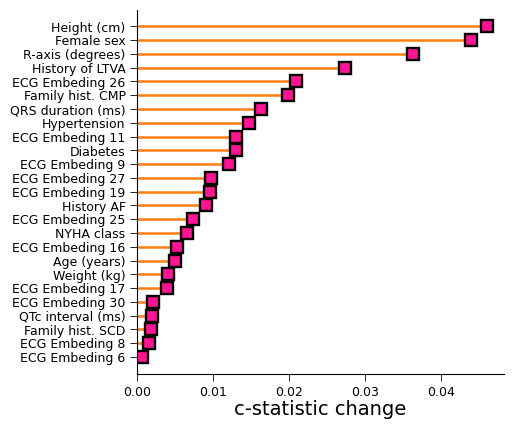

In [3]:
fig, ax = plt.subplots(1, figsize=(12*CMTOINCH, 12*CMTOINCH))

# make plot
_, ax = ml.lollipop(
     values=data[VALUES].to_numpy(), labels=data[LABELS].to_numpy(),
    line_color='tab:orange', linewidth=1.8, dot_color='deeppink', 
    dot_edge_color='black', dot_size=8, dot_edge_size=1.7, reverse_y=True, 
    ax=ax, kwargs_plot_dict={'marker':'s'},
                    )
# labels and ticks
ax.tick_params(axis="x", labelsize=TLAB_SIZE, length=TLEN, width=TICKS_WD,
        rotation=0)
ax.tick_params(axis="y", labelsize=TLAB_SIZE, length=TLEN, width=TICKS_WD,
        rotation=0)
# add lables
ax.set_ylabel('')
ax.set_xlabel(X_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)
# limits
xlim = ax.get_xlim()
ax.set_xlim(0, xlim[1]*0.95)

## Calibration plots

In [4]:
# load data 
data = examples.load_calibration_bins()

# constants
X_LAB = 'Predicted risk'
Y_LAB = 'Observed risk'
LINE_COL = ['lightcoral', 'lightgreen']
LINE_LW = [1.5, 1.5]
LINE_LS = ['--', '--']
DOT_COL = ['lightcoral', 'lightgreen']
DOT_MARK = ['o', 'o']


data.head()

average_predict_risk  average_observed_risk  lower_observed_risk  \
bins                                                                     
0                 0.077704               0.071429             0.008770   
1                 0.158541               0.178571             0.060643   
2                 0.238182               0.285714             0.132237   
3                 0.340155               0.259259             0.111145   
4                 0.468930               0.464286             0.275109   

      upper_observed_risk  no_subjects  
bins                                    
0                0.235035           28  
1                0.368933           28  
2                0.486668           28  
3                0.462849           27  
4                0.661301           28

Text(0.5, 0, 'Predicted risk')

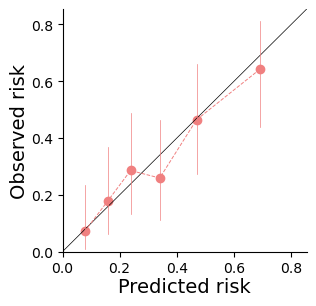

In [5]:
# make figure
fig, ax = plt.subplots(1, figsize=(8*CMTOINCH, 8*CMTOINCH))

# make plot
_, ax = ml.calibration(data, predicted='average_predict_risk', observed='average_observed_risk',
                       lower_observed='lower_observed_risk', upper_observed='upper_observed_risk',
                      ax=ax)
# labels
ax.set_ylabel(Y_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)
ax.set_xlabel(X_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)

Text(0.5, 0, 'Predicted risk')

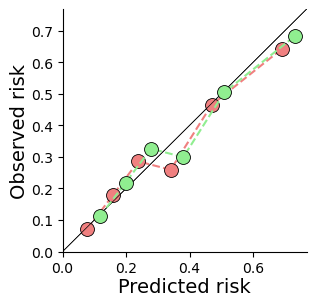

In [6]:
# multiple lines
data2 = data.copy()
data2[['average_predict_risk', 'average_observed_risk']] = \
     data2[['average_predict_risk', 'average_observed_risk']] + 0.04
# making dict
data_dict = {'one': data, 'two': data2}

# make figure
fig, ax = plt.subplots(1, figsize=(8*CMTOINCH, 8*CMTOINCH))

# make plot
_, ax = ml.calibration(data_dict, predicted='average_predict_risk', observed='average_observed_risk',
                       ci_colour=None, ci_linewidth=None, 
                       dot_marker=DOT_MARK, dot_colour=DOT_COL, 
                       line_colour=LINE_COL, line_linestyle=LINE_LS, line_linewidth=LINE_LW,
                       kwargs_dot_dict={'s':100, 'edgecolor':'black', 'linewidths':0.6, 'zorder':2},
                       ax=ax)
# labels
ax.set_ylabel(Y_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)
ax.set_xlabel(X_LAB, fontsize=LAB_SIZE, labelpad=LAB_PAD)

## Decision curve plots
Decision cruve analysis compares the net-benefit (representing the pendalised difference between true and false positives) of any number of models across a decision threshold (the predicted probabilities). Typically these plots include extereme models were either everyone is treated or not. 

(<Figure size 300x300 with 1 Axes>,
 <Axes: xlabel='Threshold', ylabel='Net benefit'>)

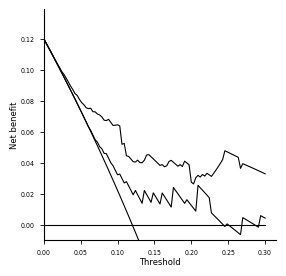

In [7]:
# import example data
data = examples.load_net_benefit_data()
# calculate the net benefit
nb_obj = ml.DecisionCurve(data)
nb_obj.calc_net_benefit(
    outcome='Composite outcome',modelnames=['DCM-PROGRESS', 'maggic (3-years risk of death)'],
    thresholds=list(np.linspace(0.0, 0.3, 100))
)
# plotting
nb_obj.plot(figsize=(3,3))

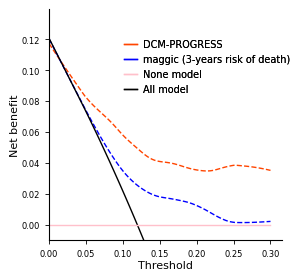

In [8]:
# Let's add some more colour and linetypes, and smoothing
MODEL_NAMES = nb_obj.MODEL_NAMES
COL_DICT = {k:j for j, k in zip(['orangered', 'blue', 'pink', 'black'], MODEL_NAMES)}
LINE_DICT = {k:j for j, k in zip(['--', '--', '-', '-'], MODEL_NAMES)}
nb_obj.LABEL_FONT_SIZE=8
nb_obj.TICK_LAB_SIZE=6
# plotting
f, ax = nb_obj.plot(figsize=(3,3), col_dict=COL_DICT, line_dict=LINE_DICT, 
           linewidth=1, lowess_frac=1/3, kwargs_lowess={'it':3})
# adding a legend
cmap = COL_DICT
patches = [Line2D([0], [0], color=v, label=k, lw=1) for k, v in cmap.items()]
leg1 = ax.legend(handles=patches , ncol=1,                
                    loc = 'center',
                    bbox_to_anchor=(0.68, 0.75),
                    borderpad=0.0, handlelength=1.3,columnspacing=0.0,
                    handletextpad=0.6, frameon=False, fancybox=False, shadow=False,
                    fontsize=7, markerscale=0.05,
                    )
ax.add_artist(leg1)

In [9]:
help(ml)

Help on module plot_misc.machine_learning in plot_misc:

NAME
    plot_misc.machine_learning - A collection of figure templates relevant for machine learning projects.

DESCRIPTION
    Includes, for example, code for lollipop graphs or calibration plots.

CLASSES
    builtins.object
        DecisionCurve

    class DecisionCurve(builtins.object)
     |  DecisionCurve(data: pandas.core.frame.DataFrame)
     |
     |  Calculates the net benefit for one or more prediction models. Can also
     |  produce an matplotlib figure, returning the figure and axes for further
     |  downstream manipulations
     |
     |  Attributes
     |  ----------
     |  data : pd.DataFrame,
     |      The provided input data.
     |  TICK_WIDTH : float, default 0.6
     |      The width ticks.
     |  TICK_LAB_SIZE : float, default 4.5
     |      The fontsize of the tick labels.
     |  TICK_LEN : float, default 3.0
     |      The tick length.
     |  LABEL_FONT_SIZE : float, default 6.0
     |      The 